<!-- dom:TITLE: Ch.7: Introduction to classes -->
# Ch.7: Introduction to classes
<!-- dom:AUTHOR: Hans Petter Langtangen at Simula Research Laboratory & University of Oslo, Dept. of Informatics -->
<!-- Author: --> **Hans Petter Langtangen**, Simula Research Laboratory and University of Oslo, Dept. of Informatics

Date: **Aug 15, 2015**

<br>

<font color='red'>
    
**Modified by R. Becker (rb), 2019-07-14<br>
The original notebook by HPL on classes is comprehensive.<br>
In class we used only a selection of the topics, paragraphs or cells.<br>
I tried to adapt this notebook to Python 3 but the transfer is not complete, yet!**

</font>


# Basics of classes

<!-- dom:FIGURE: [fig-class/associations/classes1.jpg, width=500 frac=1] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/associations/classes1.jpg" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-class/associations/classes2.png, width=500 frac=1] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/associations/classes2.png" width=500>

<!-- end figure -->



## Class = functions + data (variables) in one unit

  * A class packs together data (a collection of variables) and functions as *one single unit*

  * As a programmer you can create a new class and thereby a new object type (like `float`, `list`, `file`, ...)

  * A class is much like a module: a collection of "global" variables and functions that belong together

  * There is only one instance of a module while a class can have many instances (copies)

  * Modern programming applies classes to a large extent

  * It will take some time to master the class concept

  * Let's learn by doing!




## Representing a function by a class; background

Consider a function of $t$ with a parameter $v_0$:

$$
y(t; v_0)=v_0t - {1\over2}gt^2
$$

We need both $v_0$ and $t$ to evaluate $y$ (and $g=9.81$), but
how should we implement this?

**Having $t$ and $v_0$ as arguments:**

In [4]:
def y(t, v0):
    g = 9.81
    return v0*t - 0.5*g*t**2

**Having $t$ as argument and $v_0$ as global variable:**

In [5]:
def y(t):
    g = 9.81
    return v0*t - 0.5*g*t**2

Motivation: $y(t)$ is a function of $t$ only



<!-- Because $y(t)$ is a function of $t$ only. With a class, with -->
<!-- have a function $y(t)$ of $t$ only, but it also contains the value of $v_0$. -->

## Representing a function by a class; idea

 * With a class, `y(t)` can be a function of `t` only, but still have

  `v0` and `g` as parameters with given values.
 * The class packs together a function `y(t)` and data (`v0`, `g`)



## Representing a function by a class; technical overview

  * We make a class `Y` for $y(t;v_0)$ with variables `v0` and `g`
    and a function `value(t)` for computing $y(t;v_0)$

  * Any class should also have a function `__init__` for initialization of the variables



<!-- dom:FIGURE: [fig-class/UML_class_Y.png, width=120 frac=0.18] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/UML_class_Y.png" width=120>

<!-- end figure -->


## Representing a function by a class; the code

In [13]:
class Y:
    def __init__(self, v0):
        self.v0 = v0
        self.g = 9.81

    def value(self, t):
        s = self.v0*t - 0.5*self.g*t**2
        return s

Usage:

In [14]:
y = Y(v0=3)            # create instance (object)
s = y.value(0.1)       # compute function value
s

0.25095

In [15]:
franz = Y(v0 = 9)

In [16]:
franz.value(0.1)

0.85095

In [19]:
import numpy as np
t = np.arange(0,2,0.01)

In [20]:
y1 = Y(v0=3)
y2 = Y(v0=5)
y3 = Y(v0=10)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
y3.v0 = 20

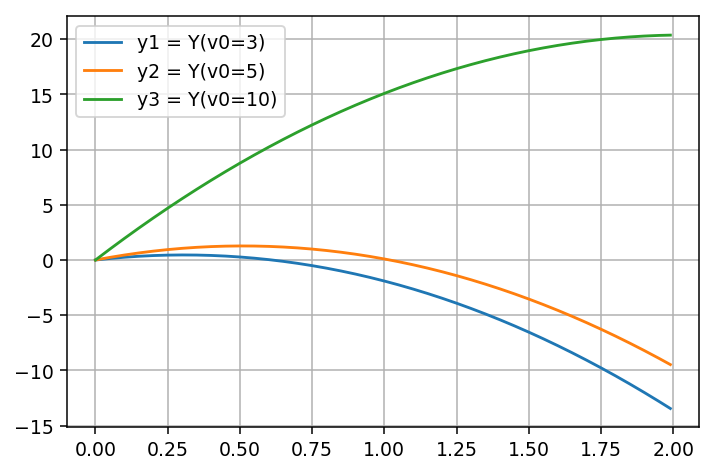

In [29]:
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi = 136)
ax.plot(t,y1.value(t), label = "y1 = Y(v0=3)")
ax.plot(t,y2.value(t), label = "y2 = Y(v0=5)")
ax.plot(t,y3.value(t), label = "y3 = Y(v0=10)")
ax.legend()
ax.grid(True)
plt.show()

## Representing a function by a class; the constructor

When we write

In [30]:
y = Y(v0=3)

we create a new variable (instance) `y` of type `Y`.
`Y(3)` is a call to the *constructor*:

In [31]:
    def __init__(self, v0):
        self.v0 = v0
        self.g = 9.81

## What is this `self` variable? Stay cool - it will be understood later as you get used to it

 * Think of `self` as `y`, i.e., the new variable to be created. `self.v0 = ...` means that we attach a variable `v0` to `self` (`y`).

 * `Y(3)` means `Y.__init__(y, 3)`, i.e., set `self=y`, `v0=3`

 * Remember: `self` is always first parameter in a function, but never inserted in the call!

 * After `y = Y(3)`, `y` has two variables `v0` and `g`

In [33]:
print (y.v0)
print (y.g)

3
9.81


> *In mathematics you
> don't understand things. You just get used to them.*
> John von Neumann, mathematician, 1903-1957.



## Representing a function by a class; the value method

  * Functions in classes are called *methods*

  * Variables in classes are called *attributes*

Here is the `value` method:

In [34]:
def value(self, t):
    return self.v0*t - 0.5*self.g*t**2

Example on a call:

In [35]:
v = y.value(t=0.1)

`self` is left out in the call, but Python automatically inserts `y` as the `self` argument inside the `value` method. Think of the call as

In [36]:
Y.value(y, t=0.1)

0.25095

Inside `value` things "appear" as

In [37]:
return y.v0*t - 0.5*y.g*t**2

SyntaxError: 'return' outside function (<ipython-input-37-9d4d6a855946>, line 1)

`self` gives access to "global variables" in the class object.



## Representing a function by a class; summary

  * Class `Y` collects the attributes `v0` and `g` and the method `value` as one unit

  * `value(t)` is function of `t` only, but has automatically access to the parameters `v0` and `g` as `self.v0` and `self.g`

  * The great advantage: we can send `y.value` as an ordinary function of `t` to any other function that expects a function `f(t)` of one variable

In [39]:
import numpy as np

def table(f, tstop, n):
    for t in np.linspace(0, tstop, n):
        print (t, f(t))

#def g(t):
#    return np.sin(t)*np.exp(-t)

#table(g, 2*np.pi, 101)         # send ordinary function

y = Y(6.5)
table(y.value, 2*np.pi, 101)   # send class method

0.0 0.0
0.06283185307179587 0.3890428811317358
0.12566370614359174 0.7393574345935969
0.1884955592153876 1.0509436603855835
0.25132741228718347 1.3238015585076952
0.3141592653589793 1.5579311289599325
0.3769911184307752 1.7533323717422955
0.4398229715025711 1.910005286854783
0.5026548245743669 2.0279498742973963
0.5654866776461628 2.107166134070135
0.6283185307179586 2.147654066172999
0.6911503837897546 2.149413670605988
0.7539822368615504 2.1124449473691036
0.8168140899333463 2.036747896462343
0.8796459430051422 1.9223225178857075
0.942477796076938 1.769168811639199
1.0053096491487339 1.577286777722815
1.0681415022205298 1.3466764161365568
1.1309733552923256 1.0773377268804243
1.1938052083641215 0.7692707099544149
1.2566370614359172 0.422475365358534
1.3194689145077132 0.03695169309277624
1.3823007675795091 -0.38730030684285666
1.4451326206513049 -0.850280634448362
1.5079644737231008 -1.3519892897237415
1.5707963267948968 -1.8924262726689989
1.6336281798666925 -2.4715915832841286
1.69

In [40]:
y.value

<bound method Y.value of <__main__.Y object at 0x00000228F1A36630>>

In [41]:
np.linspace(0,100,50)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

## Representing a function by a class; the general case

Given a function with $n+1$ parameters and one independent variable,

$$
f(x; p_0,\ldots,p_n)
$$

it is wise to represent `f` by a class where
$p_0,\ldots,p_n$ are attributes and where there is a method, say `value(self, x)`, for computing $f(x)$

In [42]:
class MyFunc:
    def __init__(self, p0, p1, p2, ..., pn):
        self.p0 = p0
        self.p1 = p1
        ...
        self.pn = pn

    def value(self, x):
        return ...

SyntaxError: invalid syntax (<ipython-input-42-0ae6eba62040>, line 2)

## Class for a function with four parameters

$$
v(r; \beta, \mu_0, n, R) = \left({\beta\over 2\mu_0}\right)^{{1\over n}}
{n \over n+1}\left( R^{1 + {1\over n}} - r^{1 + {1\over n}}\right)
$$

In [44]:
class VelocityProfile:
    def __init__(self, beta, mu0, n, R):
        self.beta, self.mu0, self.n, self.R = \
        beta, mu0, n, R

    def value(self, r):
        beta, mu0, n, R = \
        self.beta, self.mu0, self.n, self.R
        n = float(n)  # ensure float divisions
        v = (beta/(2.0*mu0))**(1/n)*(n/(n+1))*\
            (R**(1+1/n) - r**(1+1/n))
        return v

v = VelocityProfile(R=1, beta=0.06, mu0=0.02, n=0.1)
print (v.value(r=0.1))

5.242276278356668


## Rough sketch of a general Python class

In [47]:
class MyClass:
    def __init__(self, p1, p2):
        self.attr1 = p1
        self.attr2 = p2

    def method1(self, arg):
        # can init new attribute outside constructor:
        self.attr3 = arg
        return self.attr1 + self.attr2 + self.attr3

    def method2(self):
        print ('Hello!')

m = MyClass(4, 10)
print (m.method1(-2))
m.method2()

12
Hello!


It is common to have a constructor where attributes are initialized, but this is not a requirement - attributes can be defined whenever desired



## You can learn about other versions and views of class Y in the course book

  * The book features a section on a different version of class `Y` where there is no constructor (which is possible)

  * The book also features a section on how to implement classes without using classes

  * These sections may be clarifying - or confusing




## But what is this self variable? I want to know now!

**Warning.**

You have two choices:

1. follow the detailed explanations of what `self ` really is

2. postpone understanding `self` until you have much more
   experience with class programming (suddenly `self` becomes clear!)



The syntax

In [48]:
y = Y(3)

can be thought of as

In [49]:
Y.__init__(y, 3)   # class prefix Y. is like a module prefix

Then

In [50]:
self.v0 = v0

NameError: name 'v0' is not defined

is actually

In [51]:
y.v0 = 3

## How `self` works in the `value` method

In [52]:
v = y.value(2)

can alternatively be written as

In [53]:
v = Y.value(y, 2)

So, when we do `instance.method(arg1, arg2)`, `self` becomes
`instance` inside `method`.



## Working with multiple instances may help explain `self`

`id(obj)`: print unique Python identifier of an object

In [55]:
class SelfExplorer:
    """Class for computing a*x."""
    def __init__(self, a):
        self.a = a
        print ('init: a=%g, id(self)=%d' % (self.a, id(self)))

    def value(self, x):
        print ('value: a=%g, id(self)=%d' % (self.a, id(self)))
        return self.a*x

In [56]:
s1 = SelfExplorer(1)

init: a=1, id(self)=2374875964640


In [57]:
id(s1)

2374875964640

In [58]:
s2 = SelfExplorer(2)

init: a=2, id(self)=2374875963576


In [59]:
id(s2)

2374875963576

In [60]:
s1.value(4)

value: a=1, id(self)=2374875964640


4

In [61]:
SelfExplorer.value(s1, 4)

value: a=1, id(self)=2374875964640


4

In [62]:
s2.value(5)

value: a=2, id(self)=2374875963576


10

In [63]:
SelfExplorer.value(s2, 5)

value: a=2, id(self)=2374875963576


10

## But what is this self variable? I want to know now!

**Warning.**

You have two choices:

1. follow the detailed explanations of what `self ` really is

2. postpone understanding `self` until you have much more
   experience with class programming (suddenly `self` becomes clear!)



The syntax

In [64]:
y = Y(3)

can be thought of as

In [65]:
Y.__init__(y, 3)   # class prefix Y. is like a module prefix

Then

In [66]:
self.v0 = v0

NameError: name 'v0' is not defined

is actually

In [67]:
y.v0 = 3

## How `self` works in the `value` method

In [68]:
v = y.value(2)

can alternatively be written as

In [69]:
v = Y.value(y, 2)

So, when we do `instance.method(arg1, arg2)`, `self` becomes
`instance` inside `method`.



## Working with multiple instances may help explain `self`

`id(obj)`: print unique Python identifier of an object

In [71]:
class SelfExplorer:
    """Class for computing a*x."""
    def __init__(self, a):
        self.a = a
        print ('init: a=%g, id(self)=%d' % (self.a, id(self)))

    def value(self, x):
        print ('value: a=%g, id(self)=%d' % (self.a, id(self)))
        return self.a*x

In [72]:
s1 = SelfExplorer(1)

init: a=1, id(self)=2374875965256


In [73]:
id(s1)

2374875965256

In [74]:
s2 = SelfExplorer(2)

init: a=2, id(self)=2374875964472


In [75]:
id(s2)

2374875964472

In [76]:
s1.value(4)

value: a=1, id(self)=2374875965256


4

In [77]:
SelfExplorer.value(s1, 4)

value: a=1, id(self)=2374875965256


4

In [78]:
s2.value(5)

value: a=2, id(self)=2374875964472


10

In [79]:
SelfExplorer.value(s2, 5)

value: a=2, id(self)=2374875964472


10

## Another class example: a bank account

  * Attributes: name of owner, account number, balance

  * Methods: deposit, withdraw, pretty print

In [80]:
class Account:
    def __init__(self, name, account_number, initial_amount):
        self.name = name
        self.no = account_number
        self.balance = initial_amount

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        self.balance -= amount

    def dump(self):
        s = '%s, %s, balance: %s' % \
            (self.name, self.no, self.balance)
        print (s)

## UML diagram of class Account

<!-- dom:FIGURE: [fig-class/UML_class_Account.png, width=120 frac=0.15] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/UML_class_Account.png" width=120>

<!-- end figure -->


## Example on using class Account

In [84]:
a1 = Account('John Olsson', '19371554951', 20000)
a2 = Account('Liz Olsson',  '19371564761', 20000)
a1.deposit(1000)
a1.withdraw(4000)
a2.withdraw(10500)
a1.withdraw(3500)
#print ("a1's balance:", a1.balance)

In [85]:
print ("a1's balance:", a1.balance)

a1's balance: 13500


In [92]:
a1.balance = 1.0e9

In [94]:
a1.name = "Rolf Becker"  # hijacking the account! harharrrr ...

In [95]:
a1.dump()

Rolf Becker, 19371554951, balance: 1000000000.0


## Use underscore in attribute names to avoid misuse

**Possible, but not intended use:**

**The assumptions on correct usage:**

  * The attributes should *not* be changed!

  * The `balance` attribute can be viewed

  * Changing `balance` is done through `withdraw` or `deposit`



**Remedy:**

Attributes and methods not intended for use outside the class can be marked as *protected* by prefixing the name with an underscore (e.g., `_name`). This is just a convention - and no technical way of avoiding attributes and methods to be accessed.



## Improved class with attribute protection (underscore)

In [96]:
class AccountP:
    def __init__(self, name, account_number, initial_amount):
        self._name = name
        self._no = account_number
        self._balance = initial_amount

    def deposit(self, amount):
        self._balance += amount

    def withdraw(self, amount):
        self._balance -= amount

    def get_balance(self):    # NEW - read balance value
        return self._balance

    def dump(self):
        s = '%s, %s, balance: %s' % \
            (self._name, self._no, self._balance)
        print (s)

In [97]:
rob = AccountP("Rob Murali Alamgir","0815",+682.30)

In [99]:
rob.dump()

Rob Murali Alamgir, 0815, balance: 682.3


In [100]:
rob.deposit(500)

In [101]:
rob.dump()

Rob Murali Alamgir, 0815, balance: 1182.3


## Usage of improved class AccountP

In [103]:
a1 = AccountP('John Olsson', '19371554951', 20000)
a1.withdraw(4000)

print (a1._balance)      # it works, but a convention is broken

print (a1.get_balance()) # correct way of viewing the balance

a1._no = '19371554955' # this is a "serious crime"!

16000
16000


## Another example: a phone book

  * A phone book is a list of data about persons

  * Data about a person: name, mobile phone, office phone, private phone, email

  * Let us create a class for data about a person!

  * Methods:

    * Constructor for initializing name, plus one or more other data

    * Add new mobile number

    * Add new office number

    * Add new private number

    * Add new email

    * Write out person data



## UML diagram of class Person

<!-- dom:FIGURE: [fig-class/UML_class_Person.png, width=240 frac=0.2] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/UML_class_Person.png" width=240>

<!-- end figure -->


## Basic code of class Person

In [104]:
 class Person:
    def __init__(self, name,
                 mobile_phone=None, office_phone=None,
                 private_phone=None, email=None):
        self.name = name
        self.mobile = mobile_phone
        self.office = office_phone
        self.private = private_phone
        self.email = email

    def add_mobile_phone(self, number):
        self.mobile = number

    def add_office_phone(self, number):
        self.office = number

    def add_private_phone(self, number):
        self.private = number

    def add_email(self, address):
        self.email = address

## Code of a dump method for printing all class contents

In [106]:
 class Person:
    ...
    def dump(self):
        s = self.name + '\n'
        if self.mobile is not None:
            s += 'mobile phone:   %s\n' % self.mobile
        if self.office is not None:
            s += 'office phone:   %s\n' % self.office
        if self.private is not None:
            s += 'private phone:  %s\n' % self.private
        if self.email is not None:
            s += 'email address:  %s\n' % self.email
        print (s)

**Usage:**

In [107]:
p1 = Person('Hans Petter Langtangen', email='hpl@simula.no')
p1.add_office_phone('67828283'),
p2 = Person('Aslak Tveito', office_phone='67828282')
p2.add_email('aslak@simula.no')
phone_book = [p1, p2]                           # list
phone_book = {'Langtangen': p1, 'Tveito': p2}   # better
for p in phone_book:
    p.dump()

TypeError: object() takes no parameters

## Another example: a class for a circle

  * A circle is defined by its center point $x_0$, $y_0$ and its radius $R$

  * These data can be attributes in a class

  * Possible methods in the class: `area`, `circumference`

  * The constructor initializes $x_0$, $y_0$ and $R$

In [111]:
from scipy.constants import pi
class Circle:
    def __init__(self, x0, y0, R):
        self.x0, self.y0, self.R = x0, y0, R

    def area(self):
        return pi*self.R**2

    def circumference(self):
        return 2*pi*self.R

In [112]:
c = Circle(2, -1, 5)
print ('A circle with radius %g at (%g, %g) has area %g' % \
      (c.R, c.x0, c.y0, c.area()))

A circle with radius 5 at (2, -1) has area 78.5398


## Test function for class Circle

In [113]:
def test_Circle():
    R = 2.5
    c = Circle(7.4, -8.1, R)

    from math import pi
    expected_area = pi*R**2
    computed_area = c.area()
    diff = abs(expected_area - computed_area)
    tol = 1E-14
    assert diff < tol, 'bug in Circle.area, diff=%s' % diff

    expected_circumference = 2*pi*R
    computed_circumference = c.circumference()
    diff = abs(expected_circumference - computed_circumference)
    assert diff < tol, 'bug in Circle.circumference, diff=%s' % diff

# Special methods

In [114]:
class MyClass:
    def __init__(self, a, b):
    ...

p1 = MyClass(2, 5)
p2 = MyClass(-1, 10)

p3 = p1 + p2
p4 = p1 - p2
p5 = p1*p2
p6 = p1**7 + 4*p3

IndentationError: expected an indented block (<ipython-input-114-05af9d9c80b9>, line 3)

<!-- dom:FIGURE: [fig-class/associations/special_methods1.jpg, width=500 frac=1] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/associations/special_methods1.jpg" width=500>

<!-- end figure -->


## *Special methods* allow nice syntax and are recognized by double leading and trailing underscores

In [115]:
def __init__(self, ...)
def __call__(self, ...)
def __add__(self, other)

# Python syntax
y = Y(4)
print y(2)
z = Y(6)
print y + z

# What's actually going on
Y.__init__(y, 4)
print Y.__call__(y, 2)
Y.__init__(z, 6)
print Y.__add__(y, z)

SyntaxError: invalid syntax (<ipython-input-115-3e63cd31749a>, line 1)

We shall learn about many more such *special methods*



## Example on a call special method

Replace the `value` method by a *call* special method:

In [116]:
class Y:
    def __init__(self, v0):
        self.v0 = v0
        self.g = 9.81

    def __call__(self, t):
        return self.v0*t - 0.5*self.g*t**2

Now we can write

In [117]:
y = Y(3)
v = y(0.1) # same as v = y.__call__(0.1) or Y.__call__(y, 0.1)

Note:

 * The instance `y` behaves and looks as a function!

 * The `value(t)` method does the same, but `__call__` allows nicer syntax for computing function values



## Representing a function by a class revisited

Given a function with $n+1$ parameters and one independent variable,

$$
f(x; p_0,\ldots,p_n)
$$

it is wise to represent `f` by a class where $p_0,\ldots,p_n$
are attributes and `__call__(x)` computes $f(x)$

In [118]:
class MyFunc:
    def __init__(self, p0, p1, p2, ..., pn):
        self.p0 = p0
        self.p1 = p1
        ...
        self.pn = pn

    def __call__(self, x):
        return ...

SyntaxError: invalid syntax (<ipython-input-118-ed154e2606b2>, line 2)

## Can we automatically differentiate a function?

Given some mathematical function in Python, say

In [119]:
def f(x):
    return x**3

can we make a class `Derivative` and write

In [120]:
dfdx = Derivative(f)

NameError: name 'Derivative' is not defined

so that `dfdx` behaves as a function that computes the derivative of `f(x)`?

In [122]:
print (dfdx(2))   # computes 3*x**2 for x=2

NameError: name 'dfdx' is not defined

## Automagic differentiation; solution

**Method.**

We use numerical differentiation "behind the curtain":

$$
f'(x) \approx {f(x+h)-f(x)\over h}
$$

for a small (yet moderate) $h$, say $h=10^{-5}$



**Implementation.**

In [123]:
class Derivative:
    def __init__(self, f, h=1E-5):
        self.f = f
        self.h = float(h)

    def __call__(self, x):
        f, h = self.f, self.h      # make short forms
        return (f(x+h) - f(x))/h

## Automagic differentiation; demo

In [124]:
from math import *
df = Derivative(sin)
x = pi
df(x)

-0.9999999999898844

In [125]:
cos(x)  # exact

-1.0

In [126]:
def g(t):
    return t**3

In [127]:
dg = Derivative(g)
t = 1
dg(t)  # compare with 3 (exact)

3.000030000110953

## Automagic differentiation; useful in Newton's method

Newton's method solves nonlinear equations $f(x)=0$, but the method requires $f'(x)$

In [128]:
def Newton(f, xstart, dfdx, epsilon=1E-6):
    ...
    return x, no_of_iterations, f(x)

Suppose $f'(x)$ requires boring/lengthy derivation, then class `Derivative` is handy:

In [129]:
def f(x):
    return 100000*(x - 0.9)**2 * (x - 1.1)**3

In [130]:
df = Derivative(f)
xstart = 1.01
Newton(f, xstart, df, epsilon=1E-5)

NameError: name 'no_of_iterations' is not defined

## Automagic differentiation; test function

  * How can we test class `Derivative`?

  * Method 1: compute $(f(x+h)-f(x))/h$ by hand for some $f$ and $h$

  * Method 2: utilize that linear functions are differentiated
    exactly by our numerical formula, regardless of $h$

Test function based on method 2:

In [131]:
def test_Derivative():
    # The formula is exact for linear functions, regardless of h
    f = lambda x: a*x + b
    a = 3.5; b = 8
    dfdx = Derivative(f, h=0.5)
    diff = abs(dfdx(4.5) - a)
    assert diff < 1E-14, 'bug in class Derivative, diff=%s' % diff

## Automagic differentiation; explanation of the test function

**Use of lambda functions:**

In [132]:
f = lambda x: a*x + b

is equivalent to

In [133]:
def f(x):
    return a*x + b

Lambda functions are convenient for producing quick, short code



**Use of closure:**

In [134]:
f = lambda x: a*x + b
a = 3.5; b = 8
dfdx = Derivative(f, h=0.5)
dfdx(4.5)

3.5

Looks straightforward...but

 * How can `Derivative.__call__` know `a` and `b` when it calls
   our `f(x)` function?

 * Local functions inside functions remember (have access to)
   *all* local variables in the function they are defined (!)

 * `f` can access `a` and `b` in `test_Derivative` even when
   called from `__call__` in class `Derivative

 * `f` is known as a *closure* in computer science




## Automagic differentiation detour; sympy solution (exact differentiation via symbolic expressions)

SymPy can perform exact, symbolic differentiation:

In [135]:
>>> from sympy import *
>>> def g(t):
...     return t**3
...
>>> t = Symbol('t')
>>> dgdt = diff(g(t), t)           # compute g'(t)
>>> dgdt
3*t**2

>>> # Turn sympy expression dgdt into Python function dg(t)
>>> dg = lambdify([t], dgdt)
>>> dg(1)
3

3

## Automagic differentiation detour; class based on sympy

In [136]:
import sympy as sp

class Derivative_sympy:
    def __init__(self, f):
        # f: Python f(x)
        x = sp.Symbol('x')
        sympy_f = f(x)
        sympy_dfdx = sp.diff(sympy_f, x)
        self.__call__ = sp.lambdify([x], sympy_dfdx)

In [137]:
def g(t):
   return t**3

In [138]:
def h(y):
   return sp.sin(y)

In [139]:
dg = Derivative_sympy(g)
dh = Derivative_sympy(h)
dg(1)   # 3*1**2 = 3

TypeError: 'Derivative_sympy' object is not callable

In [140]:
from math import pi
dh(pi)  # cos(pi) = -1

TypeError: 'Derivative_sympy' object is not callable

## Automagic integration; problem setting

<!-- dom:FIGURE: [fig-class/integral_comic_strip.png, width=800 frac=1] -->
<!-- begin figure -->

<p></p>
<img src="fig-class/integral_comic_strip.png" width=800>

<!-- end figure -->


Given a function $f(x)$, we want to compute

$$
F(x; a) = \int_a^x f(t)dt
$$

## Automagic integration; technique

$$
F(x; a) = \int_a^x f(t)dt
$$

Technique: Midpoint rule or Trapezoidal rule, here the latter:

$$
\int_a^x f(t)dt = h\left({1\over2}f(a) + \sum_{i=1}^{n-1} f(a+ih) + {1\over2}f(x)\right)
$$

Desired application code:

In [142]:
def f(x):
    return exp(-x**2)*sin(10*x)

a = 0; n = 200
F = Integral(f, a, n)
x = 1.2
print (F(x))

SympifyError: Sympify of expression 'could not parse '<function f at 0x00000228F2C25AE8>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

## Automagic integration; implementation

In [143]:
def trapezoidal(f, a, x, n):
    h = (x-a)/float(n)
    I = 0.5*f(a)
    for i in range(1, n):
        I += f(a + i*h)
    I += 0.5*f(x)
    I *= h
    return I

Class `Integral` holds `f`, `a` and `n` as attributes and has a call special method for computing the integral:

In [144]:
class Integral:
    def __init__(self, f, a, n=100):
        self.f, self.a, self.n = f, a, n

    def __call__(self, x):
        return trapezoidal(self.f, self.a, x, self.n)

## Automagic integration; test function

  * How can we test class `Integral`?

  * Method 1: compute by hand for some $f$ and small $n$

  * Method 2: utilize that linear functions are integrated
    exactly by our numerical formula, regardless of $n$

Test function based on method 2:

In [145]:
def test_Integral():
    f = lambda x: 2*x + 5
    F = lambda x: x**2 + 5*x - (a**2 + 5*a)
    a = 2
    dfdx = Integralf, a, n=4)
    x = 6
    diff = abs(I(x) - (F(x) - F(a)))
    assert diff < 1E-15, 'bug in class Integral, diff=%s' % diff

SyntaxError: invalid syntax (<ipython-input-145-36ca7e2eefae>, line 5)

## Special method for printing

  * In Python, we can usually print an object `a` by `print a`,
    works for built-in types (strings, lists, floats, ...)

  * Python does not know how to print objects of a user-defined class,
    but if the class defines a method `__str__`, Python will use this method to convert an object to a string

Example:

In [146]:
class Y:
    ...
    def __call__(self, t):
        return self.v0*t - 0.5*self.g*t**2

    def __str__(self):
        return 'v0*t - 0.5*g*t**2; v0=%g' % self.v0

Demo:

In [147]:
y = Y(1.5)
y(0.2)

TypeError: object() takes no parameters

In [149]:
print (y)

## Class for polynomials; functionality

A polynomial can be specified by a list of its coefficients. For example,
$1 - x^2 + 2x^3$ is

$$
1 + 0\cdot x - 1\cdot x^2 + 2\cdot x^3
$$

and the coefficients can be stored as `[1, 0, -1, 2]`

**Desired application code:**

In [150]:
p1 = Polynomial([1, -1])
print p1

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(p1)? (<ipython-input-150-f0fb7a280070>, line 2)

In [151]:
p2 = Polynomial([0, 1, 0, 0, -6, -1])
p3 = p1 + p2
print p3.coeff

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(p3.coeff)? (<ipython-input-151-3973f5d995cd>, line 3)

In [152]:
print p3

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(p3)? (<ipython-input-152-485c5564ddaf>, line 1)

In [153]:
p2.differentiate()
print p2

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(p2)? (<ipython-input-153-d050b0dfee52>, line 2)

How can we make class `Polynomial`?



## Class Polynomial; basic code

In [154]:
class Polynomial:
    def __init__(self, coefficients):
        self.coeff = coefficients

    def __call__(self, x):
        s = 0
        for i in range(len(self.coeff)):
            s += self.coeff[i]*x**i
        return s

## Class Polynomial; addition

In [155]:
class Polynomial:
    ...

    def __add__(self, other):
        # return self + other

        # start with the longest list and add in the other:
        if len(self.coeff) > len(other.coeff):
            coeffsum = self.coeff[:]  # copy!
            for i in range(len(other.coeff)):
                coeffsum[i] += other.coeff[i]
        else:
            coeffsum = other.coeff[:] # copy!
            for i in range(len(self.coeff)):
                coeffsum[i] += self.coeff[i]
        return Polynomial(coeffsum)

## Class Polynomial; multiplication

**Mathematics:**

Multiplication of two general polynomials:

$$
\left(\sum_{i=0}^Mc_ix^i\right)\left(\sum_{j=0}^N d_jx^j\right)
= \sum_{i=0}^M \sum_{j=0}^N c_id_j x^{i+j}
$$

The coeff. corresponding to power $i+j$ is $c_i\cdot d_j$. The
list `r` of coefficients of the result:
`r[i+j] = c[i]*d[j]` (`i` and `j` running from
0 to $M$ and $N$, resp.)



**Implementation:**

In [156]:
class Polynomial:
    ...
    def __mul__(self, other):
        M = len(self.coeff) - 1
        N = len(other.coeff) - 1
        coeff = [0]*(M+N+1)  # or zeros(M+N+1)
        for i in range(0, M+1):
            for j in range(0, N+1):
                coeff[i+j] += self.coeff[i]*other.coeff[j]
        return Polynomial(coeff)

## Class Polynomial; differentation

**Mathematics:**

Rule for differentiating a general polynomial:

$$
{d\over dx}\sum_{i=0}^n c_ix^i = \sum_{i=1}^n ic_ix^{i-1}
$$

If `c` is the list of coefficients, the derivative has a list
of coefficients, `dc`, where `dc[i-1] = i*c[i]` for
`i` running from 1 to the largest index in `c`.
Note that `dc` has one element less than `c`.



**Implementation:**

In [157]:
class Polynomial:
    ...
    def differentiate(self):    # change self
        for i in range(1, len(self.coeff)):
            self.coeff[i-1] = i*self.coeff[i]
        del self.coeff[-1]

    def derivative(self):       # return new polynomial
        dpdx = Polynomial(self.coeff[:])  # copy
        dpdx.differentiate()
        return dpdx

## Class Polynomial; pretty print

In [158]:
class Polynomial:
    ...
    def __str__(self):
        s = ''
        for i in range(0, len(self.coeff)):
            if self.coeff[i] != 0:
                s += ' + %g*x^%d' % (self.coeff[i], i)
        # fix layout (lots of special cases):
        s = s.replace('+ -', '- ')
        s = s.replace(' 1*', ' ')
        s = s.replace('x^0', '1')
        s = s.replace('x^1 ', 'x ')
        s = s.replace('x^1', 'x')
        if s[0:3] == ' + ':  # remove initial +
            s = s[3:]
        if s[0:3] == ' - ':  # fix spaces for initial -
            s = '-' + s[3:]
        return s

## Class for polynomials; usage

Consider

$$
p_1(x)= 1-x,\quad p_2(x)=x - 6x^4 - x^5
$$

and their sum

$$
p_3(x) = p_1(x) + p_2(x) = 1 -6x^4 - x^5
$$

In [159]:
p1 = Polynomial([1, -1])
print p1

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(p1)? (<ipython-input-159-f0fb7a280070>, line 2)

In [162]:
p2 = Polynomial([0, 1, 0, 0, -6, -1])
p3 = p1 + p2
print (p3.coeff)

TypeError: object() takes no parameters

In [163]:
p2.differentiate()
print (p2)

NameError: name 'p2' is not defined

## The programmer is in charge of defining special methods!

How should, e.g., `__add__(self, other)` be defined? This is completely up to the programmer, depending on what is meaningful by `object1 + object2`.



An anthropologist was asking a primitive tribesman about arithmetic.  When the anthropologist asked, *What does two and two make?* the tribesman replied, *Five.*  Asked to explain, the tribesman said, *If I have a rope with two knots, and another rope with two knots, and I join the ropes together, then I have five knots.*



## Special methods for arithmetic operations

In [164]:
c = a + b    #  c = a.__add__(b)

c = a - b    #  c = a.__sub__(b)

c = a*b      #  c = a.__mul__(b)

c = a/b      #  c = a.__div__(b)

c = a**e     #  c = a.__pow__(e)

## Special methods for comparisons

In [165]:
a == b       #  a.__eq__(b)

a != b       #  a.__ne__(b)

a < b        #  a.__lt__(b)

a <= b       #  a.__le__(b)

a > b        #  a.__gt__(b)

a >= b       #  a.__ge__(b)

False

## Class for vectors in the plane

**Mathematical operations for vectors in the plane:**

$$
\begin{align*}
(a,b) + (c,d) &= (a+c, b+d)\\
(a,b) - (c,d) &= (a-c, b-d)\\
(a,b)\cdot(c,d) &= ac + bd\\
(a,b) &= (c, d)\hbox{ if }a=c\hbox{ and }b=d
\end{align*}
$$

**Desired application code:**

In [172]:
u = Vec2D(0,1)
v = Vec2D(1,0)
print (u + v)

(1, 1)


In [173]:
a = u + v
w = Vec2D(1,1)
a == w

True

In [174]:
print (u - v)

(-1, 1)


In [175]:
print (u*v)

0


## Class for vectors; implementation

In [176]:
 class Vec2D:
    def __init__(self, x, y):
        self.x = x;  self.y = y

    def __add__(self, other):
        return Vec2D(self.x+other.x, self.y+other.y)

    def __sub__(self, other):
        return Vec2D(self.x-other.x, self.y-other.y)

    def __mul__(self, other):
        return self.x*other.x + self.y*other.y

    def __abs__(self):
        return math.sqrt(self.x**2 + self.y**2)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __str__(self):
        return '(%g, %g)' % (self.x, self.y)

    def __ne__(self, other):
        return not self.__eq__(other)  # reuse __eq__

## The repr special method: `eval(repr(p))` creates `p`

In [177]:
class MyClass:
    def __init__(self, a, b):
        self.a, self.b = a, b

    def __str__(self):
        """Return string with pretty print."""
        return 'a=%s, b=%s' % (self.a, self.b)

    def __repr__(self):
        """Return string such that eval(s) recreates self."""
        return 'MyClass(%s, %s)' % (self.a, self.b)

In [178]:
m = MyClass(1, 5)
print (m)      # calls m.__str__()

a=1, b=5


In [179]:
str(m)       # calls m.__str__()

'a=1, b=5'

In [180]:
s = repr(m)  # calls m.__repr__()
s

'MyClass(1, 5)'

In [181]:
m2 = eval(s) # same as m2 = MyClass(1, 5)
m2           # calls m.__repr__()

MyClass(1, 5)

## Class Y revisited with repr print method

In [182]:
class Y:
    """Class for function y(t; v0, g) = v0*t - 0.5*g*t**2."""

    def __init__(self, v0):
        """Store parameters."""
        self.v0 = v0
        self.g = 9.81

    def __call__(self, t):
        """Evaluate function."""
        return self.v0*t - 0.5*self.g*t**2

    def __str__(self):
        """Pretty print."""
        return 'v0*t - 0.5*g*t**2; v0=%g' % self.v0

    def __repr__(self):
        """Print code for regenerating this instance."""
        return 'Y(%s)' % self.v0

## Class for complex numbers; functionality

Python already has a class `complex` for complex numbers, but implementing such a class is a good pedagogical example on class programming (especially with special methods).



**Usage:**

In [185]:
u = complex(2,-1)
v = complex(1)     # zero imaginary part
w = u + v
print (w)

(3-1j)


In [186]:
w != u

True

In [187]:
u*v

(2-1j)

In [188]:
u < v

TypeError: '<' not supported between instances of 'complex' and 'complex'

In [190]:
print (w + 4)

(7-1j)


In [191]:
print (4 - w)

(1+1j)


## Class for complex numbers; implementation (part 1)

In [192]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        return Complex(self.real + other.real,
                       self.imag + other.imag)

    def __sub__(self, other):
        return Complex(self.real - other.real,
                       self.imag - other.imag)

    def __mul__(self, other):
        return Complex(self.real*other.real - self.imag*other.imag,
                       self.imag*other.real + self.real*other.imag)

    def __div__(self, other):
        ar, ai, br, bi = self.real, self.imag, \
                         other.real, other.imag # short forms
        r = float(br**2 + bi**2)
        return Complex((ar*br+ai*bi)/r, (ai*br-ar*bi)/r)

## Class for complex numbers; implementation (part 2)

In [193]:
    def __abs__(self):
        return sqrt(self.real**2 + self.imag**2)

    def __neg__(self):   # defines -c (c is Complex)
        return Complex(-self.real, -self.imag)

    def __eq__(self, other):
        return self.real == other.real and \
               self.imag == other.imag

    def __ne__(self, other):
        return not self.__eq__(other)

    def __str__(self):
        return '(%g, %g)' % (self.real, self.imag)

    def __repr__(self):
        return 'Complex' + str(self)

    def __pow__(self, power):
        raise NotImplementedError(
          'self**power is not yet impl. for Complex')

## Refining the special methods for arithmetics

Can we add a real number to a complex number?

In [194]:
u = Complex(1, 2)
w = u + 4.5

Problem: we have assumed that `other` is `Complex`.
Remedy:

In [195]:
class Complex:
    ...
    def __add__(self, other):
        if isinstance(other, (float,int)):
            other = Complex(other)
        return Complex(self.real + other.real,
                       self.imag + other.imag)

# or

    def __add__(self, other):
        if isinstance(other, (float,int)):
            return Complex(self.real + other, self.imag)
        else:
            return Complex(self.real + other.real,
                           self.imag + other.imag)

## Special methods for "right" operands; addition

What if we try this:

In [196]:
u = Complex(1, 2)
w = 4.5 + u

TypeError: object() takes no parameters

Problem: Python's `float` objects cannot add a `Complex`.

Remedy: if a class has an `__radd__(self, other)` special method, Python applies this for `other + self`

In [197]:
class Complex:
    ...
    def __radd__(self, other):
        """Rturn other + self."""
        # other + self = self + other:
        return self.__add__(other)

## Special methods for "right" operands; subtraction

Right operands for subtraction is a bit more complicated since $a-b \neq b-a$:

In [198]:
class Complex:
    ...
    def __sub__(self, other):
        if isinstance(other, (float,int)):
            other = Complex(other)
        return Complex(self.real - other.real,
                       self.imag - other.imag)

    def __rsub__(self, other):
        if isinstance(other, (float,int)):
            other = Complex(other)
        return other.__sub__(self)

## What's in a class?

In [199]:
 class A:
    """A class for demo purposes."""
    def __init__(self, value):
        self.v = value

Any instance holds its attributes in the `self.__dict__` dictionary (Python automatically creates this dict)

In [200]:
a = A([1,2])
print (a.__dict__)  # all attributes

{'v': [1, 2]}


In [201]:
dir(a)            # what's in object a?

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'v']

In [202]:
a.__doc__         # programmer's documentation of A

'A class for demo purposes.'

## Ooops - we can add new attributes as we want!

In [203]:
a.myvar = 10            # add new attribute (!)
a.__dict__

{'v': [1, 2], 'myvar': 10}

In [204]:
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'myvar',
 'v']

In [205]:
b = A(-1)
b.__dict__              # b has no myvar attribute

{'v': -1}

In [206]:
dir(b)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'v']

## Summary of defining a class

**Example on a defining a class with attributes and methods:**

In [207]:
%matplotlib inline


class Gravity:
    """Gravity force between two objects."""
    def __init__(self, m, M):
        self.m = m
        self.M = M
        self.G = 6.67428E-11 # gravity constant

    def force(self, r):
        G, m, M = self.G, self.m, self.M
        return G*m*M/r**2

    def visualize(self, r_start, r_stop, n=100):
        from scitools.std import plot, linspace
        r = linspace(r_start, r_stop, n)
        g = self.force(r)
        title='m=%g, M=%g' % (self.m, self.M)
        plot(r, g, title=title)

## Summary of using a class

**Example on using the class:**

In [208]:
mass_moon = 7.35E+22
mass_earth = 5.97E+24

# make instance of class Gravity:
gravity = Gravity(mass_moon, mass_earth)

r = 3.85E+8  # earth-moon distance in meters
Fg = gravity.force(r)   # call class method

## Summary of special methods

  * `c = a + b` implies `c = a.__add__(b)`

  * There are special methods for `a+b`, `a-b`, `a*b`, `a/b`, `a**b`, `-a`, `if a:`, `len(a)`, `str(a)` (pretty print), `repr(a)` (recreate `a` with `eval`), etc.

  * With special methods we can create new mathematical objects like vectors, polynomials and complex numbers and write "mathematical code" (arithmetics)

  * The call special method is particularly handy: `v = c(5)` means `v = c.__call__(5)`

  * Functions with parameters should be represented by a class with the parameters as attributes and with a call special method for evaluating the function



## Summarizing example: interval arithmetics for uncertainty quantification in formulas

**Uncertainty quantification:**

Consider measuring gravity $g$ by dropping a ball from $y=y_0$ to $y=0$
in time $T$:

$$
g = 2y_0T^{-2}
$$

What if $y_0$ and $T$ are uncertain? Say $y_0\in [0.99,1.01]$ m
and $T\in [0.43, 0.47]$ s. What is the uncertainty in $g$?



## The uncertainty can be computed by interval arithmetics

**Interval arithmetics.**

Rules for computing with intervals, $p=[a,b]$ and $q=[c,d]$:

 * $p+q = [a + c, b + d]$

 * $p-q = [a - d, b - c]$

 * $pq =  [\min(ac, ad, bc, bd), \max(ac, ad, bc, bd)]$

 * $p/q = [\min(a/c, a/d, b/c, b/d), \max(a/c, a/d, b/c, b/d)]$
   ($[c,d]$ cannot contain zero)

Obvious idea: make a class for interval arithmetics!



## Class for interval arithmetics

In [213]:
class IntervalMath:
    def __init__(self, lower, upper):
        self.lo = float(lower)
        self.up = float(upper)

    def __add__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return IntervalMath(a + c, b + d)

    def __sub__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return IntervalMath(a - d, b - c)

    def __mul__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return IntervalMath(min(a*c, a*d, b*c, b*d),
                            max(a*c, a*d, b*c, b*d))

    def __div__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        if c*d <= 0: return None
        return IntervalMath(min(a/c, a/d, b/c, b/d),
                            max(a/c, a/d, b/c, b/d))
    def __str__(self):
        return '[%g, %g]' % (self.lo, self.up)

## Demo of the new class for interval arithmetics

**Code:**

In [214]:
I = IntervalMath   # abbreviate
a = I(-3,-2)
b = I(4,5)

expr = 'a+b', 'a-b', 'a*b', 'a/b'   # test expressions
for e in expr:
    print (e, '=', eval(e))

a+b = [1, 3]
a-b = [-8, -6]
a*b = [-15, -8]


TypeError: unsupported operand type(s) for /: 'IntervalMath' and 'IntervalMath'

**Output:**

```
a+b = [1, 3]
a-b = [-8, -6]
a*b = [-15, -8]
a/b = [-0.75, -0.4]
```

## Shortcomings of the class

This code

In [215]:
a = I(4,5)
q = 2
b = a*q

AttributeError: 'int' object has no attribute 'lo'

leads to

          File "IntervalMath.py", line 15, in __mul__
            a, b, c, d = self.lo, self.up, other.lo, other.up
        AttributeError: 'float' object has no attribute 'lo'


Problem: `IntervalMath` times `int` is not defined.

Remedy: (cf. class `Complex`)

In [216]:
class IntervalArithmetics:
    ...
    def __mul__(self, other):
        if isinstance(other, (int, float)):      # NEW
            other = IntervalMath(other, other)   # NEW
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return IntervalMath(min(a*c, a*d, b*c, b*d),
                            max(a*c, a*d, b*c, b*d))

(with similar adjustments of other special methods)



## More shortcomings of the class

Try to compute `g = 2*y0*T**(-2)`:
multiplication of `int` (2) and
`IntervalMath` (`y0`),
and power operation `T**(-2)` are not defined

In [217]:
class IntervalArithmetics:
    ...
    def __rmul__(self, other):
        if isinstance(other, (int, float)):
            other = IntervalMath(other, other)
        return other*self

    def __pow__(self, exponent):
        if isinstance(exponent, int):
            p = 1
            if exponent > 0:
                for i in range(exponent):
                    p = p*self
            elif exponent < 0:
                for i in range(-exponent):
                    p = p*self
                p = 1/p
            else:   # exponent == 0
                p = IntervalMath(1, 1)
            return p
        else:
            raise TypeError('exponent must int')

## Adding more functionality to the class: rounding

"Rounding" to the midpoint value:

In [218]:
a = IntervalMath(5,7)
float(a)

TypeError: float() argument must be a string or a number, not 'IntervalMath'

is achieved by

In [219]:
class IntervalArithmetics:
    ...
    def __float__(self):
        return 0.5*(self.lo + self.up)

## Adding more functionality to the class: repr and str methods

In [220]:
class IntervalArithmetics:
    ...
    def __str__(self):
        return '[%g, %g]' % (self.lo, self.up)

    def __repr__(self):
        return '%s(%g, %g)' % \
          (self.__class__.__name__, self.lo, self.up)

## Demonstrating the class: $g=2y_0T^{-2}$

In [223]:
g = 9.81
y_0 = I(0.99, 1.01)
Tm = 0.45                 # mean T
T = I(Tm*0.95, Tm*1.05)   # 10% uncertainty
print (T)

[0.4275, 0.4725]


In [224]:
g = 2*y_0*T**(-2)
g

TypeError: unsupported operand type(s) for *: 'int' and 'IntervalMath'

In [226]:
# computing with mean values:
T = float(T)
y = 1
g = 2*y_0*T**(-2)
print ('%.2f' % g)

TypeError: float() argument must be a string or a number, not 'IntervalMath'

## Demonstrating the class: volume of a sphere

In [228]:
R = I(6*0.9, 6*1.1)   # 20 % error
V = (4./3)*pi*R**3
V

TypeError: unsupported operand type(s) for ** or pow(): 'IntervalMath' and 'int'

In [229]:
print (V)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(V)? (<ipython-input-229-829fa11a86c5>, line 1)

In [230]:
print (float(V))

SyntaxError: invalid syntax (<ipython-input-230-8c7a0b0e67cc>, line 1)

In [231]:
# compute with mean values:
R = float(R)
V = (4./3)*pi*R**3
print (V)

TypeError: float() argument must be a string or a number, not 'IntervalMath'

20% uncertainty in $R$ gives almost 60% uncertainty in $V$